## King County House Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import models as ml

from sklearn.model_selection import train_test_split
from dateutil import parser

%matplotlib inline

#### 1), prepare data 

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()
df_train, df_test = train_test_split(df, test_size = 0.2) 

np_train = np.array(df_train)
np_test = np.array(df_test)

np.savez_compressed('./data/kc_house_data.npz', train=np_train, test=np_test)

In [3]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
504,8906200070,20150210T000000,280000.0,3,1.50,1670,11610,1.0,0,0,...,7,1670,0,1963,0,98055,47.4404,-122.191,1930,10200
14791,2824600180,20141024T000000,713414.0,3,2.50,2830,6000,1.0,0,3,...,9,1730,1100,1954,0,98126,47.5751,-122.378,2040,5300
13055,293800120,20150430T000000,590000.0,4,2.50,2940,29013,2.0,0,0,...,10,2940,0,1992,0,98077,47.7635,-122.044,3010,34071
20577,461003835,20141218T000000,825000.0,3,3.50,2670,3000,2.0,0,0,...,9,1870,800,2014,0,98117,47.6813,-122.372,1750,5000
13900,1242700035,20141103T000000,772000.0,4,2.75,3470,70131,1.0,0,0,...,8,1750,1720,1962,0,98005,47.6339,-122.180,2950,43560


In [4]:
def parse_date(val):
    return parser.parse(val).year

In [5]:
df_train['yr_sold'] = df_train['date'].apply(parse_date)

/Users/danhuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
504,8906200070,20150210T000000,280000.0,3,1.50,1670,11610,1.0,0,0,...,1670,0,1963,0,98055,47.4404,-122.191,1930,10200,2015
14791,2824600180,20141024T000000,713414.0,3,2.50,2830,6000,1.0,0,3,...,1730,1100,1954,0,98126,47.5751,-122.378,2040,5300,2014
13055,293800120,20150430T000000,590000.0,4,2.50,2940,29013,2.0,0,0,...,2940,0,1992,0,98077,47.7635,-122.044,3010,34071,2015
20577,461003835,20141218T000000,825000.0,3,3.50,2670,3000,2.0,0,0,...,1870,800,2014,0,98117,47.6813,-122.372,1750,5000,2014
13900,1242700035,20141103T000000,772000.0,4,2.75,3470,70131,1.0,0,0,...,1750,1720,1962,0,98005,47.6339,-122.180,2950,43560,2014


In [7]:
df_train.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold'], dtype=object)

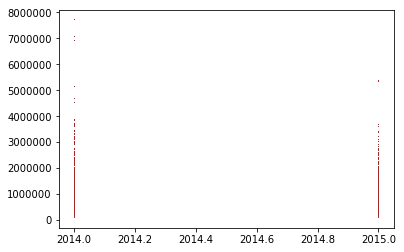

In [8]:
plt.plot(df_train['yr_sold'], df_train['price'], 'r,')
plt.show()

In [9]:
train_data = np.array(df_train)[:,2:]
train_X = train_data[:,1:].astype(np.float32)
train_y = train_data[:,0].astype(np.float32)
train_y = train_y.reshape(train_y.shape[0], 1)

In [10]:
stds_X, means_X = ml.std_normalize(train_X)

In [11]:
std_y, mean_y = ml.std_normalize(train_y.reshape(train_y.shape[0], 1))

#### 2), train linear model

In [12]:
feature_cnt = train_X.shape[1]
sample_cnt = train_X.shape[0]

In [14]:
W, b = ml.create_parameters(feature_cnt)

# batch learning
for epoch in range(0, 10000):
    h = ml.linear_model(train_X, W, b)
    dW, db = ml.mse_cost_dev(train_X, train_y, h)
    W, b = ml.gd_update(W, b, dW, db, lr=0.01)
    if (epoch + 1) % 1000 == 0:
        cur_cost = ml.mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}'.format(epoch + 1, cur_cost))

# finish
predictions = ml.linear_model(train_X, W, b)
final_cost = ml.mse_cost(predictions, train_y)
print('training finished!')
print('final cost: {0}'.format(final_cost, W, b))

epoch: 1000, cost:2637.246478246553
epoch: 2000, cost:2570.734190650329
epoch: 3000, cost:2570.0020547144286
epoch: 4000, cost:2569.993197766309
epoch: 5000, cost:2569.9930795479668
epoch: 6000, cost:2569.9930777726163
epoch: 7000, cost:2569.9930777426134
epoch: 8000, cost:2569.9930777420545
epoch: 9000, cost:2569.993077742043
epoch: 10000, cost:2569.9930777420423
training finished!
final cost: 2569.9930777420423


#### 3), using keras

In [15]:
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [16]:
train_X = train_X.reshape((train_X.shape[0], feature_cnt, 1))

In [21]:
mlp = Sequential()

mlp.add(Flatten(input_shape=(feature_cnt, 1)))
mlp.add(Dense(1))
mlp.add(Activation('linear'))

mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 19)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 20        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [22]:
sgd = SGD(lr=0.001, momentum=0.5)
adam = Adam(lr=0.001)

mlp.compile(optimizer=sgd, 
            loss='mse', 
            metrics=['mae'])

In [23]:
mlp.fit(train_X,
        train_y,
        batch_size=32,
        epochs=10,
        verbose=1)

Epoch 1/10
17290/17290 [==============================] - 0s - loss: 0.7574 - mean_absolute_error: 0.5789     
Epoch 2/10
17290/17290 [==============================] - 0s - loss: 0.3523 - mean_absolute_error: 0.3755     
Epoch 3/10
17290/17290 [==============================] - 0s - loss: 0.3133 - mean_absolute_error: 0.3516     
Epoch 4/10
17290/17290 [==============================] - 0s - loss: 0.3045 - mean_absolute_error: 0.3460     
Epoch 5/10
17290/17290 [==============================] - 0s - loss: 0.3015 - mean_absolute_error: 0.3435     
Epoch 6/10
17290/17290 [==============================] - 0s - loss: 0.3001 - mean_absolute_error: 0.3411     
Epoch 7/10
17290/17290 [==============================] - 0s - loss: 0.3000 - mean_absolute_error: 0.3423     
Epoch 8/10
17290/17290 [==============================] - 0s - loss: 0.2987 - mean_absolute_error: 0.3417     
Epoch 9/10
17290/17290 [==============================] - 0s - loss: 0.2994 - mean_absolute_error: 0.3415     
E